# Data Mining - Part 2 <br>

To conduct a `Time Measurement` assessing the runtime of the centrality measures
degree, betweenness and closeness. We aim to sample multiple random subgraphs of varying sizes from a graph. The initial steps involve initializing the dataset and the `subgraph` using the data from our preceding `Portfolio_graph` file, outlined as follows:

In [1]:
'''                       Read The News Articles Dataset of DW
'''
import pandas as pd
df = pd.read_excel('New_dw_news_output.xlsx')
print ('Number of Articles avaialable on given Dataset :', len(df['Link']))
df.head()

Number of Articles avaialable on given Dataset : 9271


,Link,Publication_Date,Category,Region,Title,Summary,Text,SubHeadings,Related_topics
0,https://www.dw.com/en/clashes-as-senegal-leade...,2024-02-05,Politics,Senegal,Clashes as Senegal leader delays vote,\nOpposition leaders in Senegal have condemned...,Opposition leaders in Senegal have condemned a...,[],[]
1,https://www.dw.com/en/germany-vows-security-su...,2024-02-05,Politics,Kosovo,Germany vows security support amid Kosovo-Serb...,\nGerman Defense Minister Boris Pistorius has ...,German Defense Minister Boris Pistorius has ca...,"['What is behind the latest tension?', 'Kosovo...",[]
2,https://www.dw.com/en/germanys-scholz-pledges-...,2024-02-05,Society,Germany,Germany's Scholz pledges solidarity with migra...,\nGerman Chancellor Olaf Scholz has praised pu...,German Chancellor Olaf Scholz has praised publ...,"['Protests against far-right\xa0', 'Germans ra...",[]
3,https://www.dw.com/en/britains-king-charles-ii...,2024-02-05,Society,United Kingdom,Britain's King Charles III diagnosed with cancer,\nBritain's King Charles III will take a break...,Britain's King Charles III will take a break f...,[],[]
4,https://www.dw.com/en/senegal-why-has-presiden...,2024-02-05,Politics,Senegal,Senegal: Why has President Macky Sall postpone...,\nSenegal's President Macky Sall's announcemen...,Senegal's President Macky Sall's announcement ...,[],[]


In [2]:
'''                     Basic Cleaning
'''
print (f"The length of Data before cleaning : {len(df['Link'])}")
df = df[(df['Category'] != 'Unknown') & (df['Region'] != 'Unknown')]
df = df.dropna(subset=['Category', 'Region']) 
print (f"The length of Data after cleaning : {len(df['Link'])}")

The length of Data before cleaning : 9271
The length of Data after cleaning : 9146


Graph Properties based on the attributes of Region and Category

In [3]:
import numpy as np
import pandas as pd
import time
import random
import networkx as nx
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

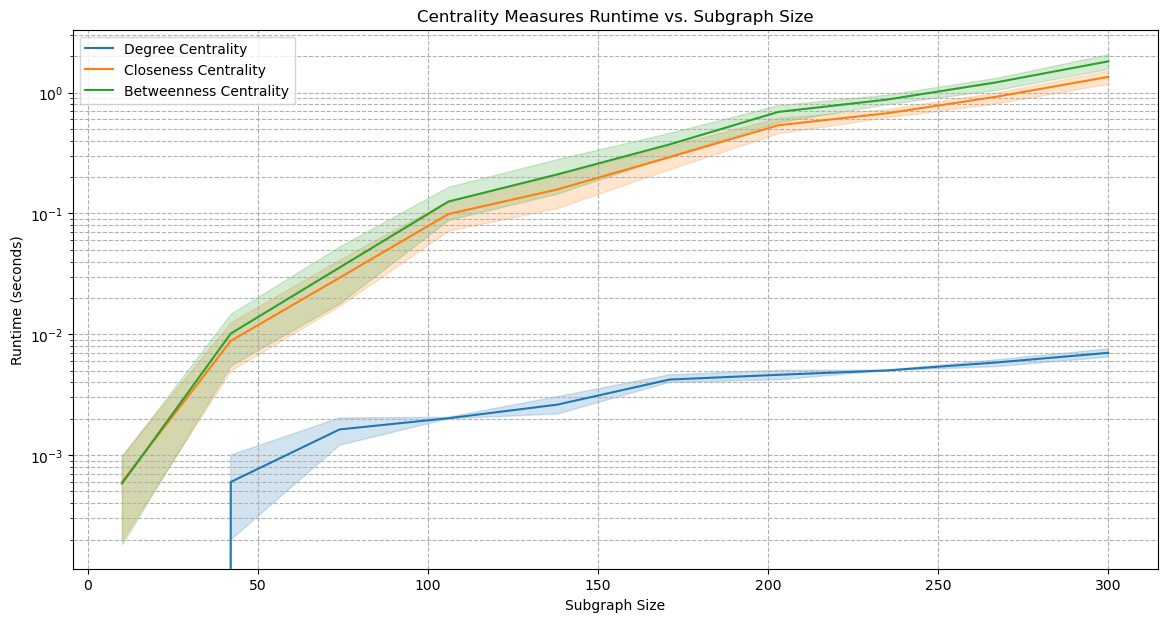

             size     degree  closeness  betweenness
count   50.000000  50.000000  50.000000    50.000000
mean   154.600000   0.003358   0.407131     0.535062
std     93.444516   0.002271   0.446207     0.597696
min     10.000000   0.000000   0.000000     0.000000
25%     74.000000   0.001980   0.032157     0.033831
50%    154.500000   0.003543   0.223757     0.282354
75%    235.000000   0.005001   0.661840     0.846117
max    300.000000   0.007915   1.631574     2.243412


In [17]:
# create graph `G` from Region and Category of dataset
pairs = [(df.iloc[i]['Region'], df.iloc[i]['Category']) for i in range(len(df))]
G = nx.Graph()
G.add_edges_from(pairs)

# Define subgraph sizes
subgraph_sizes = np.linspace(10, 300, num=10, dtype=int)

# Function to sample subgraphs and measure centrality runtimes
def measure_centrality_runtimes(G, subgraph_sizes, num_samples=5):
    runtimes = { 'size': [], 'degree': [], 'closeness': [], 'betweenness': [] }
    
    nodes = list(G.nodes())  # Convert nodes to a list
    
    for size in subgraph_sizes:
        for _ in range(num_samples):
            # Sample a subgraph of the given size
            sampled_nodes = random.sample(nodes, size)
            subgraph = G.subgraph(sampled_nodes)
            
            # Measure degree centrality runtime
            start_time = time.time()
            nx.degree_centrality(subgraph)
            runtimes['degree'].append(time.time() - start_time)
            
            # Measure closeness centrality runtime
            start_time = time.time()
            nx.closeness_centrality(subgraph)
            runtimes['closeness'].append(time.time() - start_time)
            
            # Measure betweenness centrality runtime
            start_time = time.time()
            nx.betweenness_centrality(subgraph)
            runtimes['betweenness'].append(time.time() - start_time)
            
            # Record the subgraph size
            runtimes['size'].append(size)
    
    return pd.DataFrame(runtimes)

# Measure runtimes
runtime_data = measure_centrality_runtimes(G, subgraph_sizes)

# Plotting the results
plt.figure(figsize=(14, 7))
sns.lineplot(data=runtime_data, x='size', y='degree', label='Degree Centrality')
sns.lineplot(data=runtime_data, x='size', y='closeness', label='Closeness Centrality')
sns.lineplot(data=runtime_data, x='size', y='betweenness', label='Betweenness Centrality')
plt.xlabel('Subgraph Size')
plt.ylabel('Runtime (seconds)')
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.title('Centrality Measures Runtime vs. Subgraph Size')
plt.legend()
plt.show()

# Results interpretation
print(runtime_data.describe())

### Interpretation of Results

- Subgraph Sizes: The experiment considered ten different subgraph sizes, ranging from 10 to 300 nodes, distributed reasonably given the total number of nodes in the graph (146 nodes). The sizes were sampled multiple times, resulting in 50 measurements for each centrality metric.

- Degree Centrality:

        Mean runtime: 0.0034 seconds.
        
        The runtimes are relatively low and consistent, with a standard deviation of 0.0023 seconds.
        
        The maximum runtime observed was 0.0079 seconds, indicating that degree centrality is computationally inexpensive even for larger subgraphs.
        
- Closeness Centrality:

        Mean runtime: 0.4071 seconds.
        
        This measure shows a higher runtime variability, with a standard deviation of 0.4462 seconds.
        
        The maximum runtime was 1.6316 seconds, reflecting the increased computational complexity compared to degree centrality.
        
- Betweenness Centrality:

        Mean runtime: 0.5351 seconds.
        
        Betweenness centrality also exhibits significant variability, with a standard deviation of 0.5977 seconds.
        
        The maximum runtime observed was 2.2434 seconds, the highest among the three metrics, indicating that betweenness centrality is the most computationally expensive to calculate.
        

The procedure randomly selects nodes for each subgraph, can influence the results. Variability in the connectivity and structure of the sampled subgraphs might lead to fluctuations in centrality runtimes. To mitigate this, multiple samples were taken for each subgraph size, providing a more robust measure of average runtime.

#### Summary:

The results show how the runtime for each centrality measure scales with the size of the subgraph.
Degree centrality generally runs faster than closeness and betweenness centrality because it involves fewer calculations.

The results are in line with expectations. Degree centrality has the least computational complexity, followed by closeness centrality, with betweenness centrality being the most computationally expensive due to its reliance on shortest path calculations.


These runtime measurements help the organization understand the computational cost associated with analyzing different aspects of their network.
This can guide decisions on resource allocation and the feasibility of real-time analysis for different network sizes.

----------

**Recommendations**:

For large-scale real-time analysis, focus on degree and closeness centrality as they are computationally less intensive.
Use betweenness centrality selectively or in smaller subgraphs where its insights are most valuable.

---------

**Limitations and Future Work**:


*Graph Size:* The total graph size (146 nodes) is relatively small. Future work could explore larger graphs to observe how centrality measure runtimes scale with graph size.

*Sampling Method:* Different sampling methods (e.g., stratified sampling) could be employed to ensure a more representative selection of subgraphs.

*Algorithm Optimization:* Investigate optimized algorithms or parallel computing techniques to improve the efficiency of centrality computations, particularly for betweenness centrality.

By understanding the runtime characteristics of these centrality measures, organizations can make informed decisions about which metrics to use based on their computational resources and the size of their networks.